## 7.1 Hyperbolic Equations - Advection equation

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

Cosine modulated gaussian pulse initial condition profile (tinkered params):

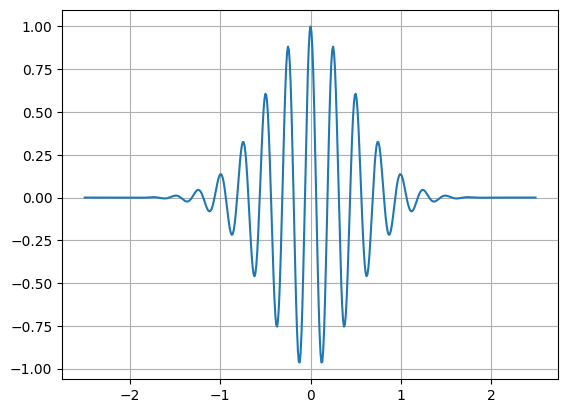

In [70]:
sigma = 0.5
L = 5      # unit lenght
N = 500      # number of grid points
h = L/N  
k_wave = 4*np.pi/sigma
x = xplot = np.arange(N)*h - L/2 
a = np.cos(k_wave*x) * np.exp(-(x**2)/(2*sigma**2)) 
plt.plot(x,a)
plt.grid()

## Numerical simulation

$$
\frac{\partial{a}}{\partial{t}} = -c \frac{\partial{a}}{\partial{x}}
$$

Note: The 1-D advection equation has a trivial analytic soln and is only useful as a test case for numerical schemes.

Time for wave to travel 1 grid point is 0.02s
Wave circles system in 100.0 steps
tau != t_w -> time step not optimal!


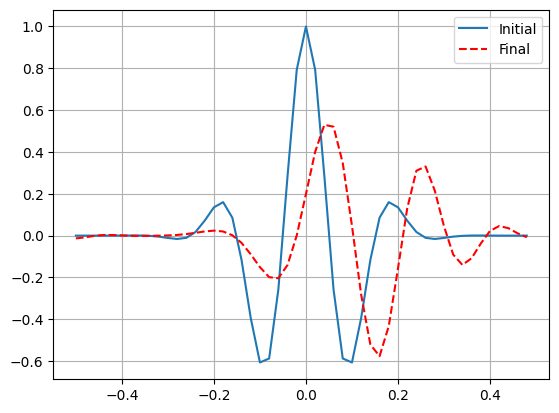

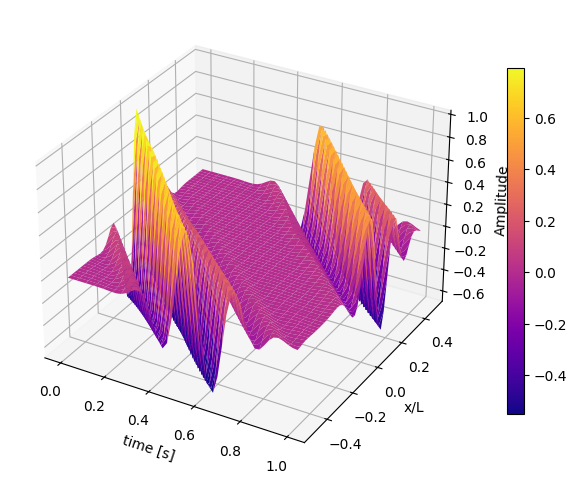

In [60]:
# numericl parameters
tau = 0.01
Method = 'LW'      # FTCS, Lax, LW
L = 1      # unit lenght
N = 50      # number of grid points
h = L/N     # grid spacing
c = 1       # wave speed
t_w = h/c 
coeff = (c*tau)/(2*h)
coeff_lw = ((c**2) * (tau**2))/(2*h**2)
print(f'Time for wave to travel 1 grid point is {t_w}s')
print(f'Wave circles system in {L/(c*tau)} steps')
if tau == t_w:
    print('tau = t_w -> optimal time step.')
else:
    print('tau != t_w -> time step not optimal!')

# plotting parameters
nsteps = int(L/(c*tau))
nplots = 50
plot_step = nsteps/nplots
plot_count = 0
time = 0
timePlot = np.zeros(nplots+1)
xplot = np.arange(N)*h - L/2 
aplot = np.empty((N,nplots+1))

# ICs and BCs
sigma = 0.1
k_wave = np.pi/sigma
xplot = np.arange(N)*h - L/2 
a = np.cos(k_wave*xplot) * np.exp(-(xplot**2)/(2*sigma**2))       # IC - cosine modulated guassian pulse
aplot[:,0] = np.copy(a)
plot_count += 1
timePlot[0] = 0

# main loop: 
for i in range(nsteps):
    time += tau 
    # space derivatives uused by Lax and FTCS
    a_rs = np.empty(N)     # right space derivative for periodic BCs
    a_rs[0] = a[N-1]
    a_rs[1:N] = a[0:N-1]
    a_ls = np.empty(N)     # left space derivative for periodic BCs
    a_ls[N-1] = a[0]
    a_ls[0:N-1] = a[1:N]
    
    if Method == 'FTCS':
        a = a - coeff*(a_rs - a_ls)
    
    if Method == 'Lax':
        a = 0.5 * (a_rs + a_ls) - coeff*(a_rs - a_ls)

    if Method == 'LW':
        a = a - coeff*(a_rs - a_ls) + coeff_lw*(a_rs + a_ls - 2*a)
        
    if (i+1) % plot_step == 0:
        aplot[:,plot_count] = np.copy(a)
        timePlot[plot_count] = time
        plot_count += 1
    

plt.plot(xplot, aplot[:,0], label='Initial')
plt.plot(xplot, aplot[:,-1], 'r--', label='Final')
plt.grid()
plt.legend()
plt.show()

from matplotlib import cm

fig,ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(9,6))
tP, xP = np.meshgrid(timePlot, xplot)
surf = ax.plot_surface(tP,xP,aplot, cmap=cm.plasma)
ax.set_xlabel('time [s]')
ax.set_ylabel('x/L')
ax.set_zlabel('Amplitude')
plt.colorbar(surf, shrink=0.75)
plt.show()


FTCS method is unstable for all timesteps $\tau$, we need to use more advanced algorithms. The wave shape should be maintained for all time, only shifted through space.

The Lax method is exact for $\tau = t_w$, unstable when $\tau > t_w$ and inaccurate (diffuses out too quickly) when $\tau < t_w$.

The Lax-Wendroff scheme behaves the same as the Lax, with the exception of improved accuracy when $\tau < t_w$, as the diffusion term increases less as the time step, $\tau$ decreases - depends on $\tau^2$ instead of $\tau$.

## Dirilecht BCs, with different ICs:
* sine wave IC at x = -L/2, runs until wave advects to x = L/2

Time for wave to travel 1 grid point is 0.02s
Wave circles system in 50.0 steps
tau = t_w -> optimal time step.


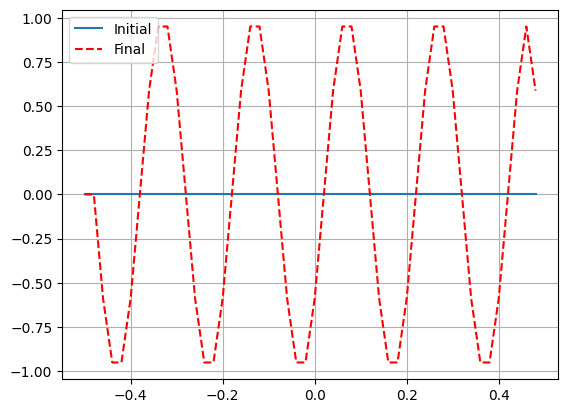

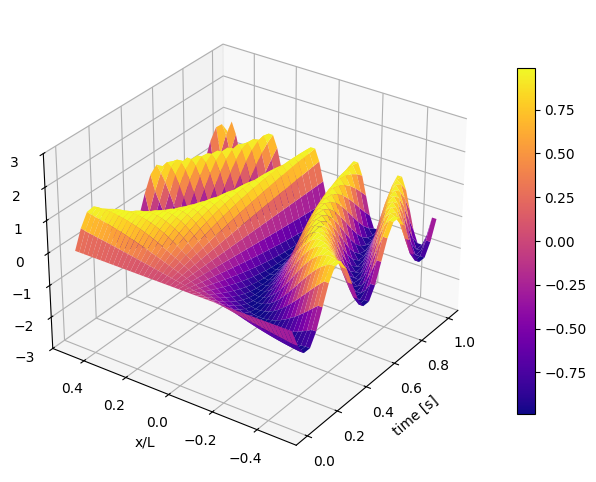

In [61]:
# numericl parameters
tau = 0.02
Method = 'Lax'      # FTCS, Lax, LW
L = 1      # unit lenght
N = 50      # number of grid points
h = L/N     # grid spacing
c = 1       # wave speed
t_w = h/c 
coeff = (c*tau)/(2*h)
coeff_lw = ((c**2) * (tau**2))/(2*h**2)
print(f'Time for wave to travel 1 grid point is {t_w}s')
print(f'Wave circles system in {L/(c*tau)} steps')
if tau == t_w:
    print('tau = t_w -> optimal time step.')
else:
    print('tau != t_w -> time step not optimal!')

# plotting parameters
nsteps = int(t_w * (N) / tau)
nplots = int(nsteps /2)
plot_step = int(nsteps/nplots)
plot_count = 0
t = 0
timePlot = np.zeros(nplots+1)
xplot = np.arange(N)*h - L/2 
aplot = np.empty((N,nplots+1))

# ICs and BCs
xplot = np.arange(N)*h - L/2 
a = np.zeros(N)
afunc = lambda t: np.sin(10*np.pi*t*xplot)
a = np.zeros(N)
a = afunc(t)
aplot[:,0] = np.copy(a)
plot_count += 1
timePlot[0] = 0

# main loop: 
for i in range(nsteps):
    t += tau 
    # space derivatives uused by Lax and FTCS
    if Method == 'FTCS':
        a[1:N-1] = a[1:N-1] - coeff*(a[2:N] - a[0:N-2])
    
    if Method == 'Lax':
        a = afunc(t)
        a[1:N-1] = 0.5 * (a[2:N] + a[0:N-2]) - coeff*(a[2:N] - a[0:N-2])

    if Method == 'LW':
        a = a - coeff*(a_rs - a_ls) + coeff_lw*(a_rs + a_ls - 2*a)
        
    if (i+1) % plot_step == 0:
        aplot[:,plot_count] = np.copy(a)
        timePlot[plot_count] = t
        plot_count += 1
    

plt.plot(xplot, aplot[:,0], label='Initial')
plt.plot(xplot, aplot[:,-1], 'r--', label='Final')
plt.grid()
plt.legend()
plt.show()

from matplotlib import cm

fig,ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(9,6))
tP, xP = np.meshgrid(timePlot, xplot)
surf = ax.plot_surface(tP,xP,aplot, cmap=cm.plasma)
ax.set_xlabel('time [s]')
ax.set_ylabel('x/L')
ax.set_zlabel('Amplitude')
ax.view_init(elev=30, azim=215)
ax.set_zlim(-3,3)
plt.colorbar(surf, shrink=0.75)
plt.show()
